In [103]:
# !pip install spacy
import nltk
# nltk.download('stopwords')
import nltk
# nltk.download('punkt')
import numpy as np
import seaborn as sns
import itertools
import re
import pandas as pd
from collections import Counter, defaultdict

import matplotlib.pyplot as plt
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.colors import LinearSegmentedColormap

import spacy
# ! python -m spacy download en_core_web_sm
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Function to Clean and pre-process the data 

In [76]:
def preprocess_data(data, col):
    for index, row in data.iterrows():
        sentence = row[col]
        if(type(sentence) is not int ):
            if(type(sentence) is not float ):
                sentencep= ""
                sentence = sentence.replace('\n','')
                sentence = re.sub('[^a-zA-Z]',' ',str(sentence))
                if col =="Content":
                    sentence = sentence[300:]
                for words in sentence.split():
                    word = ("".join(lemmatizer.lemmatize(x) for x in words if x.isalnum())).lower()
                    if not word in stop_words and len(word)>2 and word not in ENGLISH_STOP_WORDS:
                        sentencep+=word +" " 
                data[col][index] =sentencep

## Count Number of words in Dataset column 

In [77]:
def wordcount(data,col):
    countdict=defaultdict(int)
    for index, row in data.iterrows():
        sentence = row[col]
        if(type(sentence) is not int ):
            if(type(sentence) is not float):
                for word in sentence.split():
                    countdict[word]+=1
    return countdict

# To Plot word and their frequencies

In [104]:
def plottopwords(title_count,name):
    word=[]
    freq =[]
    for item in title_count[:15]:
        word.append(item[0])
        freq.append(item[1])
    indexes = np.arange(len(word))
    width = 0.5
    plt.figure(figsize=(20, 6)) 
    plt.bar(indexes, freq, width)
    plt.xticks(indexes + width*0.2, word)
    plt.xticks(fontsize=16)
    plt.savefig(name)

## Collect Non-vocabulary words 

In [105]:
def listofnonEnglish(article,col):
    non_english_words= []
    article = article[col].to_numpy().tolist()
    for tit in article:
        if(type(tit) is not int ):
            if(type(tit) is not float):
                words = tit.split(" ")
                for w in words:
                    if not wordnet.synsets(w) and w != "" and w not in non_english_words :
                        non_english_words.append(w)
    return non_english_words

## Length of articles title and content

In [106]:
def lengthofarticle(article,col):
    len_art = []
    count= 0
    article = article[col].to_numpy().tolist()
    for tit in article:
        if(type(tit) is not int ):
            if(type(tit) is not float):
                count+=1
                l= len(tit.split(" "))
                len_art.append(l)
    return len_art,count


### get given entity present in each articles

In [107]:
def entities(text,ent):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

### Get entities present in each articles

In [80]:
def get_counts(text):
        document=nlp(text)
        return [X.label for X in document.ents]

## Plot word cloud for non-vocubualry words

In [7]:

colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)
wordcloud_spam = WordCloud(background_color='white', colormap=cmap).generate(" ".join(noenglishwordsrealcontent))
plt.figure(figsize = (10,10))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("nonenglishwordscon")

## Read news articles csv data

In [31]:
fakedata =pd.read_csv("C:/Users/Administrator/Documents/masterproject2021/Dataset/Fakedataset.csv")
realdata = pd.read_csv("C:/Users/Administrator/Documents/masterproject2021/Dataset/True.csv") #kaggle data
realdatabbc = pd.read_csv("C:/Users/Administrator/Documents/masterproject2021/Dataset/Realdataset.csv")
real_news = pd.read_csv("C:/Users/Administrator/Documents/masterproject2021/Dataset/real_news.csv") #kaggle data
# print(fakedata.head(10))
# fakedata['label']=1
# fakedata['Title'].describe()
# fakedata['Content'].describe()



## Pre-Process the real and fake articles  

In [32]:
real_news = real_news.copy(deep=True) 
real_news= real_news[['title', 'content']]
preprocess_data(real_news,"title")
preprocess_data(real_news,"content")
real_news.columns = ['Title', 'Content']

real_data = realdata.copy(deep=True)
real_databbc = realdatabbc.copy(deep=True)
real_data= real_data.drop(columns = ['subject', 'date'])
real_databbc =real_databbc.drop(columns = ['Source', 'Date'])


real_data.columns = ['Title', 'Content']
preprocess_data(real_data,"Title")
preprocess_data(real_data,"Content")
real_databbc.columns = ['Title', 'Content']
preprocess_data(real_databbc,"Title")
preprocess_data(real_databbc,"Content")

res = [real_data, real_databbc,real_news]
realdatap = pd.concat(res)
realdatap.to_pickle("preprossedrealdata")


In [5]:
fake_data = fakedata.copy(deep=True) 
fake_data= fake_data.drop(columns = ['Source', 'Date'])
preprocess_data(fake_data,"Content")
preprocess_data(fake_data,"Title")
fake_data.to_pickle("preprossedfakedata")


In [72]:
f_data = pd.read_pickle("preprossedfakedata")
r_data = pd.read_pickle("preprossedrealdata")

### Exploaratory data analysis to understand top most words

In [38]:

title_count = wordcount(r_data,"Title")
title_count_ = sorted(title_count.items(), key =lambda x: x[1],reverse=True)


In [36]:
title_count = wordcount(f_data,"Title")
title_count = sorted(title_count.items(), key =lambda x: x[1],reverse=True)


<AxesSubplot:>

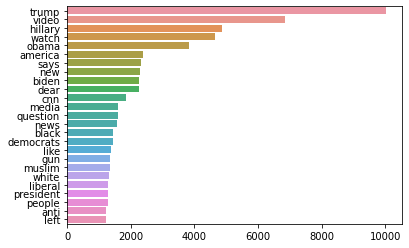

In [37]:
x,y = [],[]
for  item in title_count[:25]:
    x.append(item[0])
    y.append(item[1])
sns.barplot(x=y,y=x)

<AxesSubplot:>

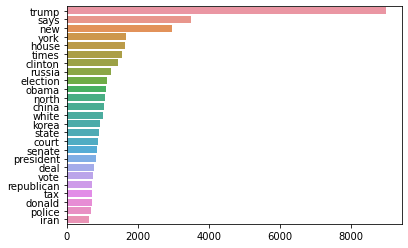

In [39]:
x,y = [],[]
for  item in title_count_[:25]:
    x.append(item[0])
    y.append(item[1])
sns.barplot(x=y,y=x)

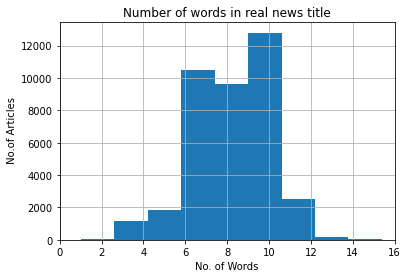

<Figure size 432x288 with 0 Axes>

In [95]:
len_of_title,co = lengthofarticle(r_data,"Title")
fig, ax = plt.subplots()
pd.Series(len_of_title).hist()
plt.title("Number of words in real news title")
plt.xlabel("No. of Words")
plt.ylabel(" No.of Articles")
plt.xlim((0,16))
plt.show()
plt.savefig("lenrealarticle")


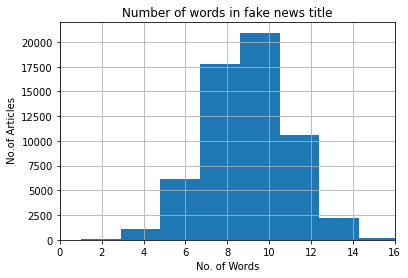

<Figure size 432x288 with 0 Axes>

In [94]:
len_of_title,c = lengthofarticle(f_data,"Title")

fig, ax = plt.subplots()
pd.Series(len_of_title).hist()
orientation='horizontal'
plt.title("Number of words in fake news title")
plt.xlabel("No. of Words")
plt.ylabel(" No.of Articles")
plt.xlim((0,16))
plt.show()
plt.savefig("lenfakearticle")


In [97]:
len_of_title,c = lengthofarticle(r_data,"Content")


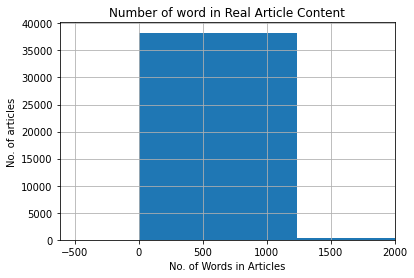

<Figure size 432x288 with 0 Axes>

In [98]:
len_of_title = lengthofarticle(r_data,"Content")
fig, ax = plt.subplots()
pd.Series(len_of_title).hist(orientation='horizontal')
plt.title("Number of word in Real Article Content")
plt.xlabel("No. of Words in Articles")
plt.ylabel("No. of articles")
# plt.xlim((None,2000))  #
plt.show()
plt.savefig("lenrealarticleCon")

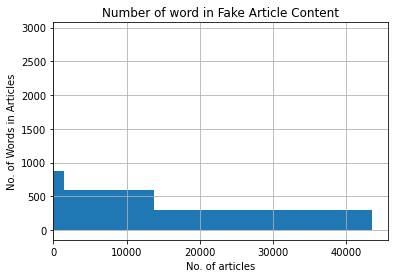

<Figure size 432x288 with 0 Axes>

In [143]:
len_of_title = lengthofarticle(f_data,"Content")
fig, ax = plt.subplots()
pd.Series(len_of_title).hist(orientation='horizontal')
plt.title("Number of word in Fake Article Content")
plt.xlabel("No. of articles")
plt.ylabel("No. of Words in Articles")
plt.show()
plt.savefig("lenfakearticlecon")

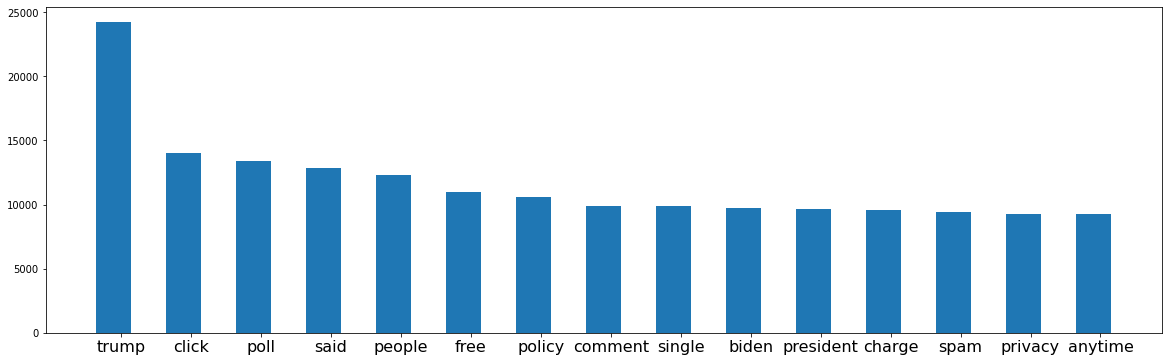

In [45]:
# Exploaratory data analysis to understand top most words
content_count = wordcount(f_data.tail(10000),"Content")
content_count = sorted(content_count.items(), key =lambda x: x[1],reverse=True)
# print(content_count)
plottopwords(content_count,"topfakecontentwords")

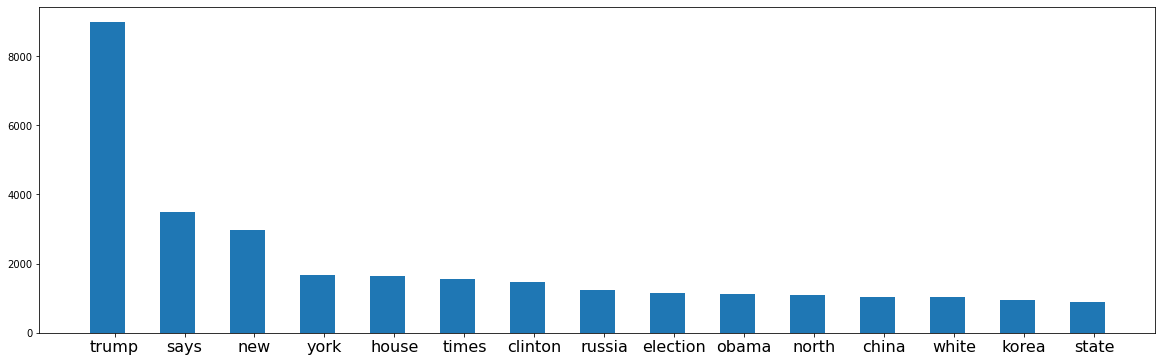

In [47]:
plottopwords(title_count_,"toprealtitlewords")

In [67]:
plottopwords(title_count,"topfaketitlewords")

In [50]:
# Merge both Fake and Real dataset , fake article has a lable value-1 and real has value 0
f_data['Label']=1
r_data['Label']=0
data= pd.concat([f_data,r_data])
data.to_pickle("data")

In [4]:
data2 =pd.read_csv("C:/Users/Administrator/Documents/masterproject2021/Dataset/news_articles.csv")
data2= data2[['title_without_stopwords','text_without_stopwords','label']]
data2 = data2.dropna()
data2.columns = ['Title','Content','Label']
preprocess_data(data2,"Content")
preprocess_data(data2,'Title')


Found 2096 articles.


In [5]:
data2.loc[unseen_data1.Label =="Fake", 'Label'] = 1
data2.loc[unseen_data1.Label =="Real", 'Label'] = 0
# unseen_data1.to_pickle("preprossedunseendata1")


In [17]:
unseendata =pd.read_csv("C:/Users/Administrator/Documents/masterproject2021/Dataset/unseendata.csv")
preprocess_data(unseendata,"Body")
preprocess_data(unseendata,"Headline")
unseen_data= unseendata.drop(columns = ['URLs'])
unseen_data.columns = ['Title','Content','Label']
unseen_data = unseen_data.dropna()
unseen_data.to_pickle("preprossedunseendata")


<ipython-input-2-5ac4550e152e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][index] =sentencep


In [24]:
data = pd.read_pickle("data") 
data2= pd.concat([data,data2])
data2 = data2.sample(frac=1).reset_index(drop=True)
data2['Content'] = data2['Title'] + " " + data2['Content']
data2 = data2.drop(['Title'], axis = 1) 
data2.to_pickle("dataconcated")

                                               Title  \
0                   watch school kids guns freaking    
1  watch triggered pro abort activists look like ...   
2  lmao feisty lady puts feminists blast watch ba...   
3  feds taxpayer funded dreamers criminals gang m...   
4     new book clinton hurt hillary run white house    

                                             Content Label  
0  watch school kids guns freaking  watch school ...     1  
1  watch triggered pro abort activists look like ...     1  
2  lmao feisty lady puts feminists blast watch ba...     1  
3  feds taxpayer funded dreamers criminals gang m...     1  
4  new book clinton hurt hillary run white house ...     1  


In [51]:
data = pd.read_pickle("data")
data = data.sample(frac=1).reset_index(drop=True)

(97731, 3)


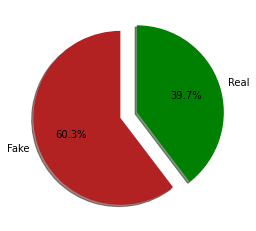

In [52]:
tar=pd.get_dummies(data.Label)[1]
labelsize = [tar.sum(),len(tar)-tar.sum()]
plt.pie(labelsize,explode=[0.1,0.1],colors=['firebrick','green'],startangle=90,shadow=True,labels=['Fake','Real'],autopct='%1.1f%%')
print(data.shape
     )

In [93]:
f_data = pd.read_pickle("preprossedfakedata")
r_data = pd.read_pickle("preprossedrealdata")
data = pd.read_pickle("data")

In [50]:
f_data =f_data.sample(frac=1)
f_data  = f_data[0:20]
print(f_data.shape)
f_data['scores'] = f_data['Title'].apply(lambda review: sid.polarity_scores(review))
f_data['compound']  = f_data['scores'].apply(lambda score_dict: score_dict['compound'])
f_data['sentiment'] = f_data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

(20, 2)


In [95]:
data =data.sample(frac=1)
data  = data[0:100]
data['scores'] = data['Title'].apply(lambda review: sid.polarity_scores(review))
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['sentiment'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

<AxesSubplot:xlabel='sentiment', ylabel='compound'>

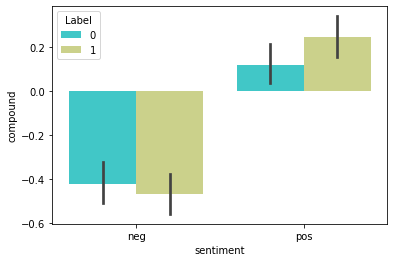

In [96]:
sns.barplot(x='sentiment',y='compound',hue='Label',data=data, palette='rainbow')

In [85]:
r_data = r_data.sample(frac=1)
r_data = r_data[0:20]



In [86]:
r_data['scores'] = r_data['Title'].apply(lambda review: sid.polarity_scores(review))
r_data['compound']  = r_data['scores'].apply(lambda score_dict: score_dict['compound'])
r_data['sentiment'] = r_data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

Sentiment Score for Real Data


<AxesSubplot:>

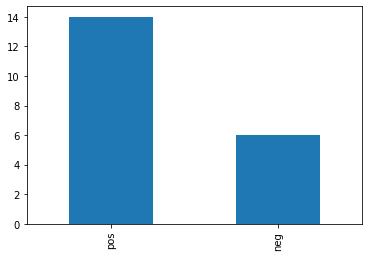

In [47]:
r_data['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:>

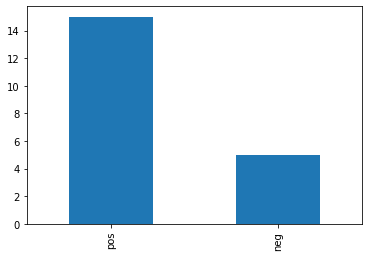

In [51]:
f_data['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:>

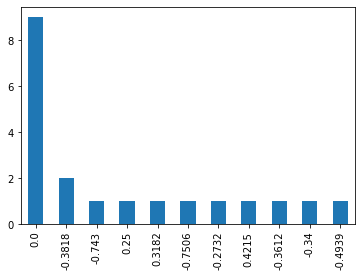

In [64]:
r_data['compound'].value_counts().plot(kind='bar') #,orientation='horizontal'

In [88]:
# sns.barplot(x='sentiment',y='compound',hue='Label',data=r_data, palette='rainbow')

# Named Entity recognization

In [46]:
f_data = pd.read_pickle("preprossedfakedata")
r_data = pd.read_pickle("preprossedrealdata")
# data = data.sample(frac=1).reset_index(drop=True)

In [109]:
# reference: https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
# Had issue with installing spacy packages locally, had run these below code on google colab.
entities=f_data['Title'].apply(lambda x : get_counts(x))
entities=[x for sub in entities for x in sub]
counter=Counter(entities)
val=counter.most_common()
x,y=map(list,zip(*val))
sns.barplot(x=y,y=x)

In [108]:
gpe=f_data['Title'].apply(lambda x: entities(x,"PERSON"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)
x,y=map(list,zip(*counter.most_common()))
sns.barplot(y,x)

In [ ]:
gpe=f_data['Title'].apply(lambda x: entities(x,"GPE"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

In [ ]:
gpe=f_data['Title'].apply(lambda x: entities(x,"ORG"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

In [ ]:
ent=r_data['Title'].apply(lambda x : get_counts(x))
ent=[x for sub in entities for x in sub]
counter=Counter(ent)
val=counter.most_common()
x,y=map(list,zip(*val))
sns.barplot(x=y,y=x)

In [ ]:
gpe=r_data['Title'].apply(lambda x: entities(x,"PERSON"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)

In [ ]:
gpe=r_data['Title'].apply(lambda x: entities(x,"GPE"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(y,x)